In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("french_lick_large_mock_data.csv")
df =pd.DataFrame(data)
# Preview the first few rows
df.head()

,Date,Guest_ID,Age,Guest_Type,Length_of_Stay,Room_Type,Revenue,Casino_Spend,Dining_Spend,Spa_Spend,Golf_Spend,Event_Attended,Satisfaction_Score,Email_Subscribed,Total_Spend
0,2023-01-01,6243,39,Tourist,4,Standard,107.53,251.827523,71.391966,89.830271,125.002745,No,5.8,No,645.58
1,2023-01-01,7614,49,Tourist,4,Deluxe,367.06,147.571109,22.544184,57.945810,51.858097,Yes,7.5,Yes,646.98
2,2023-01-01,9707,63,Loyalty_Member,2,Standard,386.05,108.491701,79.678430,11.591050,43.069446,No,6.8,Yes,628.88
3,2023-01-01,6223,59,Local,1,Standard,344.26,79.049116,21.314947,40.229198,7.902233,Yes,7.4,Yes,492.76
4,2023-01-01,9584,33,Tourist,4,Suite,367.21,48.626242,89.318590,89.473359,75.552725,No,7.8,Yes,670.18


In [38]:
df['Date'] = pd.to_datetime(df['Date'])  # if not already datetime
df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
df['Out_of_state'] = df['Guest_Type'] == 'Tourist'

In [26]:
Casino_Revenue_Trend=df.groupby(['Month'])['Casino_Spend'].sum().reset_index()
Guest_Casino_Revenue=df.groupby(['Guest_Type'])['Casino_Spend'].mean().reset_index()
Age_Revenue=df.groupby(['Age_Group'])['Casino_Spend'].mean().reset_index()
Satisfaction_Trend=df.groupby(['Month'])['Satisfaction_Score'].mean().reset_index()
Length_Stay_Revenue=df.groupby('Length_of_Stay')['Casino_Spend'].mean().reset_index()

C:\Users\logan\AppData\Local\Temp\ipykernel_7992\65098225.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Revenue=df.groupby(['Age_Group'])['Casino_Spend'].mean().reset_index()


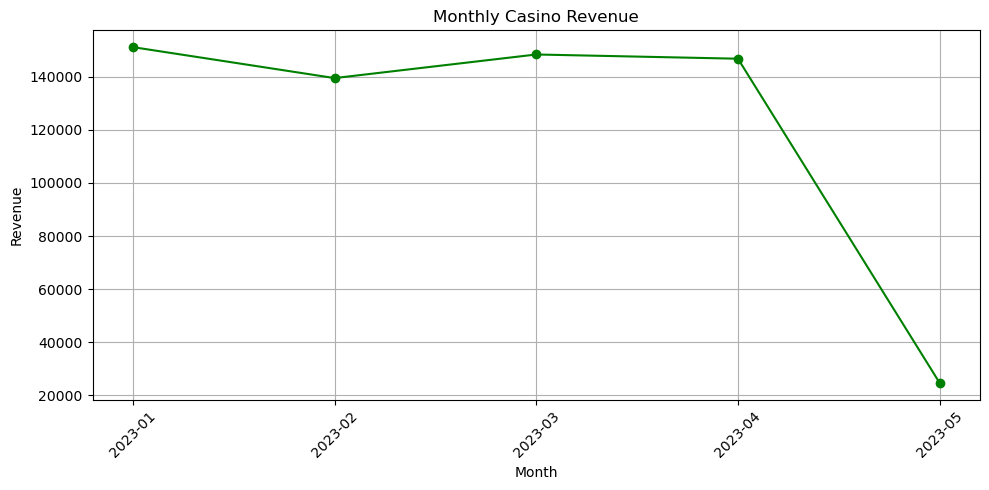

In [30]:
Casino_Revenue_Trend=df.groupby(['Month'])['Casino_Spend'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(Casino_Revenue_Trend['Month'], Casino_Revenue_Trend['Casino_Spend'],marker='o',color='green')
plt.title('Monthly Casino Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Between the months of Jan-April(Q1) casino revenue was steady, but then drastically declined going into May.
What caused this decline?

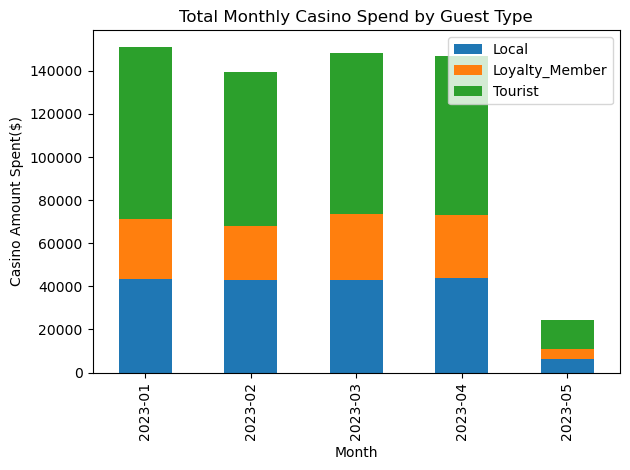

In [35]:
Guest_Casino_Revenue=df.groupby(['Month','Guest_Type'])['Casino_Spend'].sum().reset_index()
Guest_Casino_Revenue_Pivot=Guest_Casino_Revenue.pivot(index='Month',columns='Guest_Type',values='Casino_Spend')
Guest_Casino_Revenue_Pivot.plot(kind='bar',stacked=True)
plt.title('Total Monthly Casino Spend by Guest Type')
plt.xlabel('Month')
plt.ylabel('Casino Amount Spent($)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\logan\AppData\Local\Temp\ipykernel_7992\1631541068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Revenue=df.groupby(['Month','Age_Group'])['Casino_Spend'].sum().reset_index()


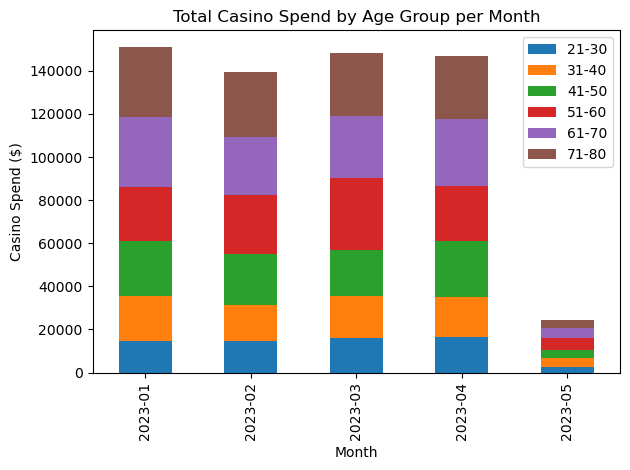

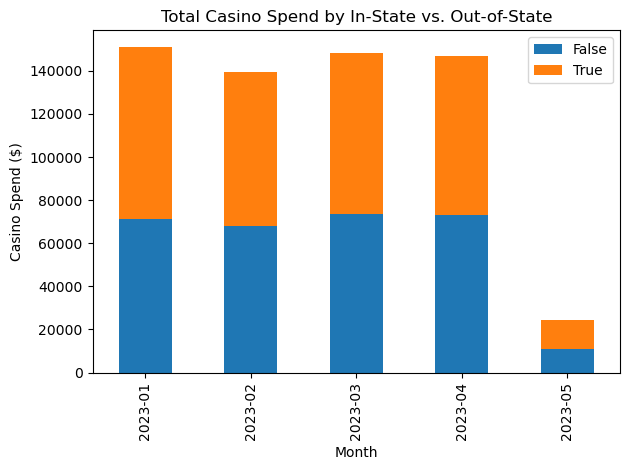

In [40]:
Age_Revenue=df.groupby(['Month','Age_Group'])['Casino_Spend'].sum().reset_index()
Local_Revenue=df.groupby(['Month','Out_of_state'])['Casino_Spend'].sum().reset_index()

Age_Revenue_Pivot=Age_Revenue.pivot(index='Month',columns='Age_Group',values='Casino_Spend')
Local_Revenue_Pivot=Local_Revenue.pivot(index='Month',columns='Out_of_state',values='Casino_Spend')

Age_Revenue_Pivot.plot(kind='bar',stacked=True)
plt.title('Total Casino Spend by Age Group per Month')
plt.xlabel('Month')
plt.ylabel('Casino Spend ($)')
plt.legend()
plt.tight_layout()
plt.show()


Local_Revenue_Pivot.plot(kind='bar', stacked=True)
plt.title('Total Casino Spend by In-State vs. Out-of-State')
plt.xlabel('Month')
plt.ylabel('Casino Spend ($)')
plt.legend()
plt.tight_layout()
plt.show()